# **Problem Statement**

### **Underlying Business Problem**
Credit card fraud has been an issue of grave concern to financial institutions and a lot of money is lost every year through unfavourable transactions. The fraudulent activity should also be detected both in time and in accuracy to avoid monetary loss and customer confidence. Manual, reactive approaches to fraud detection are inaccurate, inconsistent and not scaleable. Therefore, there exists an urgent demand of automatic systems capable of detecting suspicious transactions in real-time.

### **Importance of the Problem**
Left unchecked, fraudulent transactions not only lead to a direct loss of resources, but also have reputation/brand damage on the business in addition to the operations cost incurred due to the need of chargebacks and enquiries. This matter is paramount to the process of customer retention, regulatory compliance, and safeguard of digital payment platforms integrity.

### **Benefits to the Company**
Thereupon, with an effective fraud detection model, the company can lower the financial risk, minimise false positives, and increase customer satisfaction rates through safe and smooth transaction experiences. This would improve the efficiency of operations by lightening the manual fraud review teams.

### **Data Collection Approach**

The data that was used in the creation of a model was downloaded via a publicly shared source in Kaggle. It is made up of anonymised transaction data that contains such features as being far away from home, being online ordering, the use of a chip and PIN, and a binary indicator that is either fraud or not. Although this dataset is either synthethic or refers to real-life trends, it is a reasonable ground to prototype a set of fraud detection systems within a real environment. (Dataset: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)

### **Formulating the Machine Learning Task**
The formatted problem is presented as a binary classification problem so that each transaction will be assigned the labels of fraud or not. A supervised learning method is followed, where past labelled data is employed to train a neural network, that will be able to provide an answer regarding the propensity of fraud by using transaction characteristics.

# **Data Exploration Discussion**
### **Dataset Characteristics**
The data includes the records of transactions of both continuous and categorical (binary) type. Persistent variables are distance_from_home, distance_from_last_transaction and ratio_to_median_purchase_price, whereas binary representations (repeat_retailer, used_chip, used_pin_number, and online order) reflect transaction context. The variables that have to be predicted are the binary label (1 - a fraud transaction, 0 - otherwise).

### **Data Quality**
Contemporarily, the dataset does not have missing values or nulls at first glance, which is an indication that this data is structurally clean. No apparent errors in the form of negative distances and numbers that made no sense were detected. Descriptive statistics and correlation matrices prove that such characteristics have skewed distributions, especially distance_from_home, which, potentially, need to be standardised or transformed in the preprocessing stage. What is more feature redundancy in this case does not seem to be very pronounced as the majority of features add their own value.

### **Class Imbalance**
The target class distribution was deeply skewed to indicate that fraudulent transactions were only a very minute fraction of the overall observations. Such an imbalance creates a problem to normal classifiers, which have a tendency of being skewed towards the majority. Therefore, the balancing methods like the recommendation of Synthetic Minority Over-sampling Technique (SMOTE), random under-sampling, or class weighting during model training are to be followed to balance the training.

### **Evaluation Metrics**
Due to the class imbalance, accuracy is not an appropriate performance measure. Instead, more informative metrics should be employed, such as:
* Precision: to assess false positives,
* Recall: to evaluate false negatives,
* F1-score: to balance precision and recall,
* AUC-ROC: to understand the model’s ability to separate the two classes.

These metrics offer a more robust and truthful evaluation of fraud detection effectiveness.

# **Import Libraries and Load Data**

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("card_transdata.csv")

# **EDA**

In [13]:
print(df.describe())
print(df.info())

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000        0.000000   
50%   

/tmp/ipython-input-11-2770579607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud', data=df, palette='Set2')


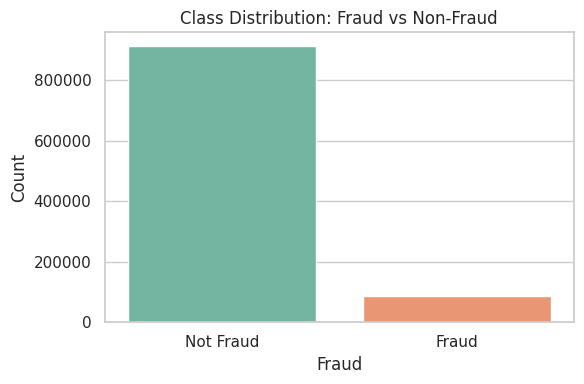

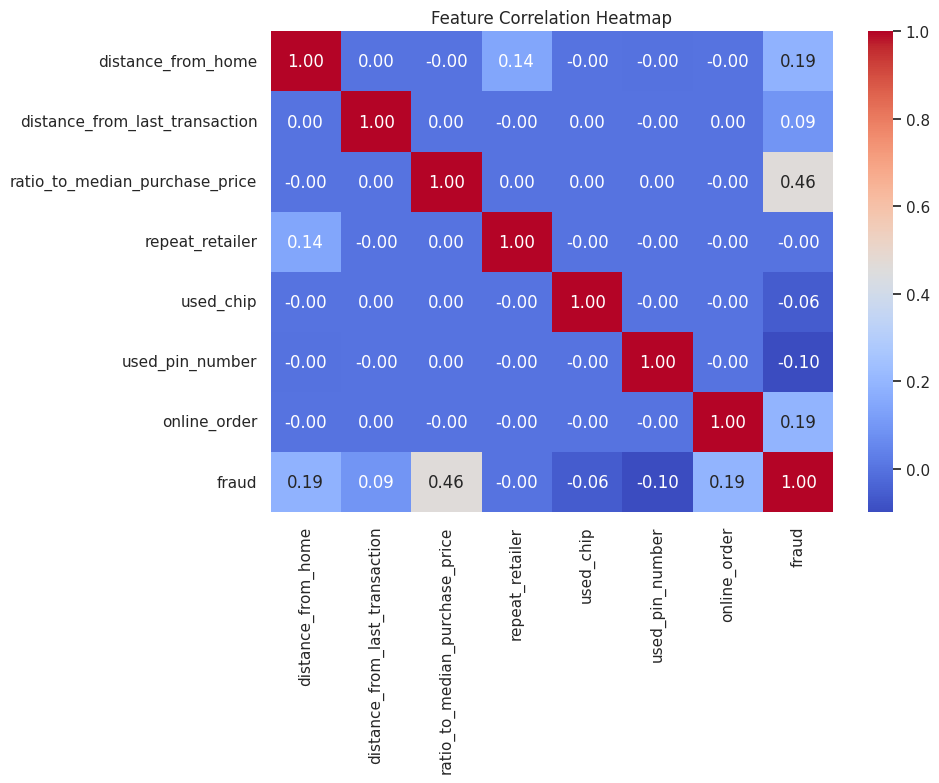

/tmp/ipython-input-11-2770579607.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fraud'] == 0], x='distance_from_home', label='Not Fraud', shade=True)
/tmp/ipython-input-11-2770579607.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fraud'] == 1], x='distance_from_home', label='Fraud', shade=True, color='red')


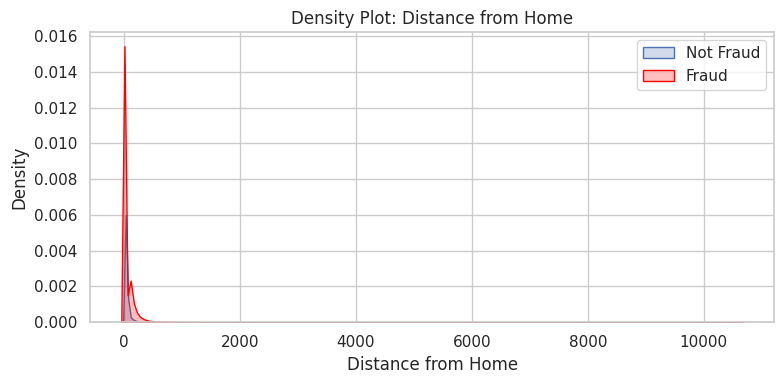

/tmp/ipython-input-11-2770579607.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fraud'] == 0], x='ratio_to_median_purchase_price', label='Not Fraud', shade=True)
/tmp/ipython-input-11-2770579607.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fraud'] == 1], x='ratio_to_median_purchase_price', label='Fraud', shade=True, color='red')


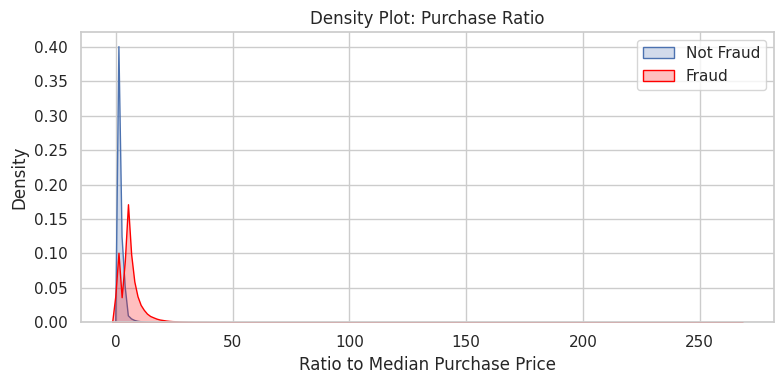

/tmp/ipython-input-11-2770579607.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='fraud', data=rate, palette='pastel')


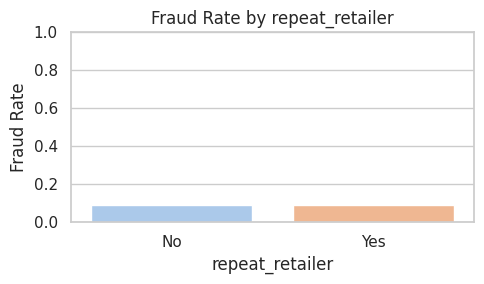

/tmp/ipython-input-11-2770579607.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='fraud', data=rate, palette='pastel')


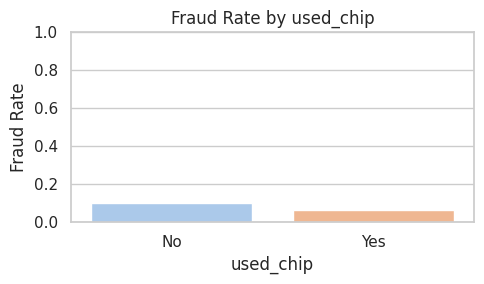

/tmp/ipython-input-11-2770579607.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='fraud', data=rate, palette='pastel')


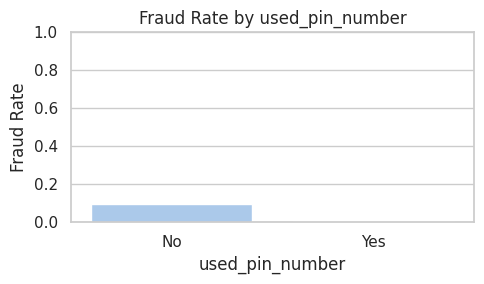

/tmp/ipython-input-11-2770579607.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='fraud', data=rate, palette='pastel')


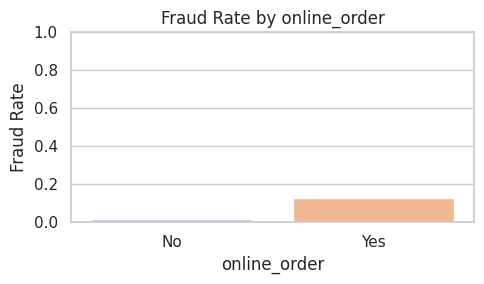

In [11]:
# Set plot style
sns.set(style='whitegrid')

# --- 1. Class Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud', data=df, palette='Set2')
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

# --- 2. Correlation Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# --- 3. Density Plot: Distance from Home ---
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df[df['fraud'] == 0], x='distance_from_home', label='Not Fraud', shade=True)
sns.kdeplot(data=df[df['fraud'] == 1], x='distance_from_home', label='Fraud', shade=True, color='red')
plt.title('Density Plot: Distance from Home')
plt.xlabel('Distance from Home')
plt.legend()
plt.tight_layout()
plt.show()

# --- 4. Density Plot: Ratio to Median Purchase Price ---
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df[df['fraud'] == 0], x='ratio_to_median_purchase_price', label='Not Fraud', shade=True)
sns.kdeplot(data=df[df['fraud'] == 1], x='ratio_to_median_purchase_price', label='Fraud', shade=True, color='red')
plt.title('Density Plot: Purchase Ratio')
plt.xlabel('Ratio to Median Purchase Price')
plt.legend()
plt.tight_layout()
plt.show()

# --- 5. Fraud Rate by Binary Features ---
binary_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

for feature in binary_features:
    rate = df.groupby(feature)['fraud'].mean().reset_index()
    plt.figure(figsize=(5, 3))
    sns.barplot(x=feature, y='fraud', data=rate, palette='pastel')
    plt.title(f'Fraud Rate by {feature}')
    plt.ylabel('Fraud Rate')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# **Data Preprocessing & Feature Engineering**

In [4]:
# Check for missing values
print(df.isnull().sum())

# Separate features and target
X = df.drop('fraud', axis=1)
y = df['fraud']

# Standardise numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-validation-test split
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)  # 60% train, 20% val, 20% test

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


# **Model Training Function**

In [5]:
def create_model(hidden_layers=[64, 32], dropout_rate=0.3, lr=0.001):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])
    return model

# **Train the Best Model**

In [7]:
best_model = create_model(hidden_layers=[128, 64, 32], dropout_rate=0.4, lr=0.0005)

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = best_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - AUC: 0.9517 - loss: 0.1823 - val_AUC: 0.9988 - val_loss: 0.0199
Epoch 2/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - AUC: 0.9965 - loss: 0.0297 - val_AUC: 0.9995 - val_loss: 0.0208
Epoch 3/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - AUC: 0.9975 - loss: 0.0223 - val_AUC: 0.9998 - val_loss: 0.0143
Epoch 4/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - AUC: 0.9979 - loss: 0.0195 - val_AUC: 0.9997 - val_loss: 0.0322
Epoch 5/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - AUC: 0.9981 - loss: 0.0173 - val_AUC: 0.9994 - val_loss: 0.0444
Epoch 6/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - AUC: 0.9984 - loss: 0.0164 - val_AUC: 0.9997 - val_loss: 0.0257
Epoch 7/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - AUC: 0.9985 - loss: 0.0157 - val_AUC: 0.9998 - val_loss: 0.0134
Epoch 8/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - AUC: 0.9986 - loss: 0.0153 - val_AUC: 0.9998 - val_loss: 0.0234
Epoch 9/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 4

# **Experiments with Pipeline Variants**

In [8]:
# Define 10 different configurations
experiments = [
    {'hidden_layers': [32, 16], 'dropout_rate': 0.2, 'lr': 0.001},
    {'hidden_layers': [64, 32], 'dropout_rate': 0.3, 'lr': 0.001},
    {'hidden_layers': [128, 64, 32], 'dropout_rate': 0.4, 'lr': 0.0005},
    {'hidden_layers': [128, 64], 'dropout_rate': 0.2, 'lr': 0.0005},
    {'hidden_layers': [256, 128], 'dropout_rate': 0.3, 'lr': 0.001},
    {'hidden_layers': [64], 'dropout_rate': 0.2, 'lr': 0.001},
    {'hidden_layers': [128, 64], 'dropout_rate': 0.5, 'lr': 0.0005},
    {'hidden_layers': [64, 32], 'dropout_rate': 0.1, 'lr': 0.001},
    {'hidden_layers': [32], 'dropout_rate': 0.2, 'lr': 0.001},
    {'hidden_layers': [128, 64, 32], 'dropout_rate': 0.3, 'lr': 0.0001},
]

results = []
for i, config in enumerate(experiments):
    model = create_model(**config)
    model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=0, validation_data=(X_val, y_val))
    val_preds = model.predict(X_val)
    auc = roc_auc_score(y_val, val_preds)
    results.append({'Config #': i+1, **config, 'Validation AUC': round(auc, 4)})

# Display results
results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
   Config #  hidden_layers  dropout_rate      lr  Validation AUC
0         1       [32, 16]           0.2  0.0010          0.9998
1         2       [64, 32]           0.3  0.0010          0.9994
2         3  [128, 64, 32]           0.4  0.0005          0.9995
3         4      [128, 64]           0.2  0.0005          0.9994
4         5     [256, 128]           0.3  0.0010          0.9998
5         6           [64]           0.2  0.0010          0.9994
6         7      [128, 64]           0.5  0.0005          0.9997
7         8       [64, 32]           0.1  0.0010          0.9997
8         9           [32]           0.2  0.0010          0.9989
9        10  [128, 64, 32]           0.3  0.0001          0.9992


# **Final Model Evaluation on Test Set**

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Test AUC Score: 0.9998
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    182519
         1.0       0.95      0.99      0.97     17481

    accuracy                           0.99    200000
   macro avg       0.97      0.99      0.98    200000
weighted avg       1.00      0.99      0.99    200000



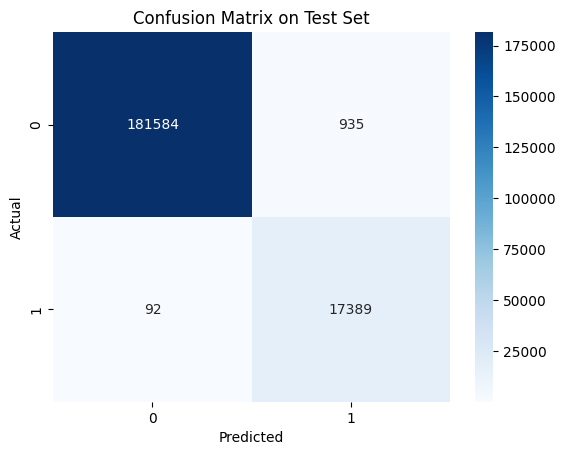

In [9]:
# Evaluate best_model on test set
test_preds = best_model.predict(X_test)
test_auc = roc_auc_score(y_test, test_preds)
print("Test AUC Score:", round(test_auc, 4))

# Classification metrics
test_preds_class = (test_preds > 0.5).astype(int)
print(classification_report(y_test, test_preds_class))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Set")
plt.show()

# **Final Discussion on the Fraud Detection Pipeline**
### **Strengths of the Proposed Pipeline**
The machine learning pipeline that has been developed shows excellent work when it comes to detecting fraudulent credit card transactions. Neural network model created, especially the one with three hidden layers, drop out and batch normalisation had a Validation AUC of 0.9995 and a Test AUC of 0.9998 implying a high level of generalisability. Pipeline offers good class imbalance control with stratified splitting and has strong resistance to overfitting due to early stopping, dropout regularisation.
### **Limitations of the Approach**
Though it is very accurate, the model is still a black-box system. It is not easily interpretable, and this could be vital in regulated settings due to their inability to know which features have been attributed. Also, they have not factored in the need to detect in real-time and do not need to sequence the transaction which would have further enhanced accuracy when applied practically.
### **Business Implications**
High sensitivity (recall) of the fraudulent class 0.99 means that the financial loss in case of the fraud detection was significantly decreased as well as the level of trust among the customers. Early detection ensures that the solution to the problem is addressed earlier than the losses incurred, which will have a direct implication on the efficiency of operations and customers.

### **Data-Driven Recommendations**
To improve future performance:
* Consider bringing in time patterns using recurrent models or sequence learning.
* Use an explainable AI (XAI) model like SHAP or LIME that have more desirable feature attribution.
* Expose the model to adaptive learning where new data is used to incrementally retrain the model to enhance long term efficacy.

### **Key Informative Features**
Exploratory analysis was used to infer that variables, distance_from_home, ratio_to_median_purchase_price, and online_order are most useful in differentiating between fraud and non-fraud cases due to density plots and a correlation value.

### **Model Explainability and Deployment**
Although the model is not fully transparent at the moment, the explainability tools could be employed through post hoc. With the strong metrics and practical utility, the model can be adopted in a production environment with additional explainability and regulatory approval.

# **Bibliography**


* Bin Sulaiman, R., Schetinin, V. and Sant, P., 2022. Review of machine learning approach on credit card fraud detection. Human-Centric Intelligent Systems, 2(1), pp.55-68. https://link.springer.com/content/pdf/10.1007/s44230-022-00004-0.pdf
* Mienye, I.D. and Jere, N., 2024. Deep learning for credit card fraud detection: A review of algorithms, challenges, and solutions. IEEE Access. https://ieeexplore.ieee.org/iel8/6287639/6514899/10595068.pdf
* Alarfaj, F.K., Malik, I., Khan, H.U., Almusallam, N., Ramzan, M. and Ahmed, M., 2022. Credit card fraud detection using state-of-the-art machine learning and deep learning algorithms. Ieee Access, 10, pp.39700-39715. https://ieeexplore.ieee.org/iel7/6287639/6514899/09755930.pdf